<span style="color:blue">

## ■ "Daum" site에서 News Data를 수집한 후 worldcloud 그리기
    
</span>

In [9]:
## 기본
import numpy as np                    # numpy 패키지 가져오기
import pandas as pd                   # pandas 패키지 가져오기
import matplotlib.pyplot as plt       # 시각화 패키지 가져오기

## Text 데이터 처리
from konlpy.tag import Okt
from konlpy.tag import Kkma
from konlpy.tag import Komoran
from konlpy.tag import Hannanum

from collections import Counter
from wordcloud import WordCloud

from bs4 import BeautifulSoup
import requests

import warnings
warnings.filterwarnings('ignore')


## (1) 해당 사이트 탐색 단계

###  ■ Daum 검색창에서 '인공지능'  입력 후 뉴스 페이지로 이동 - 해당 url 을 복사해서 url 변수에  insert

In [10]:

url ='https://search.daum.net/search?w=news&nil_search=btn&DA=NTB&enc=utf8&cluster=y&cluster_page=1&q=%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5'

req = requests.get(url)    # 해당 페이지를 가져옴

page = BeautifulSoup(req.text , 'html.parser')

print(page)



<!DOCTYPE doctype html>

<html class="unix unknown " lang="ko" xmlns="http://www.w3.org/1999/xhtml">
<head profile="http://a9.com/-/spec/opensearch/1.1/">
<meta content="text/html;charset=utf-8" http-equiv="content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="off" name="autocomplete"/>
<meta content="always" name="referrer"/>
<meta content="telephone=no" name="format-detection">
<meta content="인공지능 – Daum 검색" property="og:title"/>
<meta content="https://search.daum.net/search?w=news&amp;q=%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5" property="og:url"/>
<meta content="Daum 검색에서 인공지능에 대한 최신정보를 찾아보세요." property="og:description"/>
<meta content="https://search1.daumcdn.net/search/statics/common/img/og_search.png" property="og:image"/>
<meta content="다음검색" property="og:site_name"/>
<title>인공지능 – Daum 검색</title>
<link href="//search.daum.net/OpenSearch.xml" rel="search" title="Daum" type="application/opensearchdescription+xml"/>
<link charset="utf-8" href="//search

### ▶ 검색 데이터의 headline 을 추출한다.

#### -  F12 (검사 모드) 누른 후 해당 소스의 태그 id 혹은 class 를 찾는다.

In [4]:

titles = page.find_all(attrs='f_link_b')

print(titles)


[<a class="f_link_b" href="http://v.media.daum.net/v/20210427090038622?f=o" onclick='smartLog(this, "dc=NNS&amp;d=26o7fdjZghVm3_Hivx&amp;pg=1&amp;r=1&amp;p=4&amp;rc=10&amp;e1=16Elf9uX5H6T5xXvQV&amp;e3=0&amp;ext=dsid=26o7fdjZghVm3_Hivx", event, {"cpid": {"value": "16Elf9uX5H6T5xXvQV"}});' target="_blank">단국대, 학생들에게 <b>인공지능</b> 비서 제공</a>, <a class="f_link_b" href="http://v.media.daum.net/v/20210427094356614?f=o" onclick='smartLog(this, "dc=NNS&amp;d=26x4pnCX91CCdvK_DV&amp;pg=1&amp;r=2&amp;p=4&amp;rc=10&amp;e1=16JfL24RCJKYboAM86&amp;e3=0&amp;ext=dsid=26x4pnCX91CCdvK_DV", event, {"cpid": {"value": "16JfL24RCJKYboAM86"}});' target="_blank">인천시, <b>인공지능</b> 덕분에..방역 역할 톡톡</a>, <a class="f_link_b" href="http://v.media.daum.net/v/20210426110551422?f=o" onclick='smartLog(this, "dc=NNS&amp;d=26GqBnKjMc5X-svzxb&amp;pg=1&amp;r=3&amp;p=4&amp;rc=10&amp;e1=16PxLkJt1h6kPgSYDm&amp;e3=0&amp;ext=dsid=26GqBnKjMc5X-svzxb", event, {"cpid": {"value": "16PxLkJt1h6kPgSYDm"}});' target="_blank">아이반, 자작곡 '<b>인공지능

### ▶ 검색된 title의 크기를 확인한다.

In [5]:
print(len(titles))

10


### ▶ 검색된 title의 각각을 프린트 한다.

In [6]:

for title in titles :
    print(title.text)
    print()



단국대, 학생들에게 인공지능 비서 제공

인천시, 인공지능 덕분에..방역 역할 톡톡

아이반, 자작곡 '인공지능' 오디오 티저 공개

대전만의 인공지능 교육 문화를 누리다!

호남대학교, 인공지능 신기술 릴레이 특강

머니브레인, 대화형 인공지능 기반 ‘AI 키오스크’ 출시

인공지능 기술, 지역사회 문제 해결에 활용

대한상공회의소 서울기술교육센터-인공지능협회, ‘인공지능 인력...

인천에 인공지능융합연구센터 설립

현대重그룹, 인공지능 기반 화재 감시시스템 개발



## (2) 본격 스크래핑 단계 


### ▶ 첫 페이지부터 원하는 페이지 까지 뉴스 헤드라인울 스크래핑하는 함수 정의

In [15]:
# 해드라인 검색 및 추출 함수를 정의
# 검색 키워드 & 스타트 페이지 & 검색 마지막 페이지를 parameter(매개변수) 로 받음
# 파이썬은 매개변수가 여러개 인 경우 뒤의 매개 변수부터 디폴트값을 가질 수 있음 

title_list = []

def web_scraping(keyword, end, start = 1):    # 시작 페이지의 default 값은 1 (즉, 첫 페이지 부터 시작) 
    while 1:

        if start > end :    # 스타트 페이지가 마지막 페이지보다 크면 while 문을 빠져 나감 
            break        
        
        url ='https://search.daum.net/search?w=news&DA=PGD&enc=utf8&cluster=y&cluster_page=1&q={}&p={}'.format(keyword,start)
        #q : 쿼리(검색어)
        #괄호 안에 숫자를 써주면, 그 순서대로 나옴. (0, 1)
        #네이버 url = 'https://search.naver.com/search.naver?where=news&sm=tab_pge&query={}&start=41
        #변하지 않는 값은 지워도 무방. 

        req = requests.get(url)    # 해당 페이지를 가져옴

        page = BeautifulSoup(req.text , 'html.parser')

        titles = page.find_all(attrs='f_link_b')     # 헤드라인 기사를 가져옴 
        
        print(titles)       # 추출한 헤드라인을 확인 (10개)

        for one in titles:
            title_list.append(one.text)
            
        start += 1
        #네이버는 10씩 증가함
        
#네이버 뉴스는 본문을 가져올 수 있지만, '위키트리'등의 소규모는 힘들다.

https://search.daum.net/search?w=news&DA=PGD&enc=utf8&cluster=y&cluster_page=1&q={}&p={}

https://search.naver.com/search.naver?where=news&sm=tab_jum&query=%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5

https://search.naver.com/search.naver?where=news&sm=tab_pge&query={}&start=41

https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5&sort=0&photo=0&field=0&pd=0&ds=&de=&cluster_rank=55&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:all,a:all&start=61

### ▶ 위 함수를 호출

In [16]:
# 검색어를 입력 받음 


keyword = input('검색어를 입력하세요 : ')
print()

end_page = 10  #숙제할때 input으로 end_page 필요, 정수로 바꿔주어야 함

web_scraping(keyword, end_page)       # 10 페이지 까지 스크래핑을 해온다.


검색어를 입력하세요 : 인공지능

[<a class="f_link_b" href="http://v.media.daum.net/v/20210427090038622?f=o" onclick='smartLog(this, "dc=NNS&amp;d=26o7fdjZghVm3_Hivx&amp;pg=1&amp;r=1&amp;p=4&amp;rc=10&amp;e1=16Elf9uX5H6T5xXvQV&amp;e3=0&amp;ext=dsid=26o7fdjZghVm3_Hivx", event, {"cpid": {"value": "16Elf9uX5H6T5xXvQV"}});' target="_blank">단국대, 학생들에게 <b>인공지능</b> 비서 제공</a>, <a class="f_link_b" href="http://v.media.daum.net/v/20210427101327037?f=o" onclick='smartLog(this, "dc=NNS&amp;d=26yhzUTyBOuVU6T4j2&amp;pg=1&amp;r=2&amp;p=4&amp;rc=10&amp;e1=16JfL24RCJKYboAM86&amp;e3=0&amp;ext=dsid=26yhzUTyBOuVU6T4j2", event, {"cpid": {"value": "16JfL24RCJKYboAM86"}});' target="_blank">빅데이터 <b>인공지능</b>, 신병 전투복·운동복 만족도 높였다</a>, <a class="f_link_b" href="http://v.media.daum.net/v/20210427094356614?f=o" onclick='smartLog(this, "dc=NNS&amp;d=26x4pnCX91CCdvK_DV&amp;pg=1&amp;r=3&amp;p=4&amp;rc=10&amp;e1=16JfL24RCJKYboAM86&amp;e3=0&amp;ext=dsid=26x4pnCX91CCdvK_DV", event, {"cpid": {"value": "16JfL24RCJKYboAM86"}});' target="

[<a class="f_link_b" href="https://cp.news.search.daum.net/p/105562914" onclick='smartLog(this, "dc=NNS&amp;d=26CY9vPGi_f7YYmBwy&amp;pg=4&amp;r=1&amp;p=4&amp;rc=10&amp;e1=16yB_iNR1sCrGCnSL8&amp;e3=0&amp;ext=dsid=26CY9vPGi_f7YYmBwy", event, {"cpid": {"value": "16yB_iNR1sCrGCnSL8"}});' target="_blank">단국대, 개인 맞춤형 <b>인공지능</b> 학사지원 ‘첫 선’</a>, <a class="f_link_b" href="http://v.media.daum.net/v/20210421135707230?f=o" onclick='smartLog(this, "dc=NNS&amp;d=26sxmWIvJGkzM3-pbJ&amp;pg=4&amp;r=2&amp;p=4&amp;rc=10&amp;e1=16_-rXIov6CN5sdGtY&amp;e3=0&amp;ext=dsid=26sxmWIvJGkzM3-pbJ", event, {"cpid": {"value": "16_-rXIov6CN5sdGtY"}});' target="_blank">LG휘센 에어컨 <b>인공지능</b> '좋아요'</a>, <a class="f_link_b" href="http://v.media.daum.net/v/20210420141806056?f=o" onclick='smartLog(this, "dc=NNS&amp;d=26rXTajWkPPzQF2Qjy&amp;pg=4&amp;r=3&amp;p=4&amp;rc=10&amp;e1=16xPi3xTTvS9eQchSd&amp;e3=0&amp;ext=dsid=26rXTajWkPPzQF2Qjy", event, {"cpid": {"value": "16xPi3xTTvS9eQchSd"}});' target="_blank"><b>인공지능</b>으로 살펴보는 

[<a class="f_link_b" href="http://v.media.daum.net/v/20210418110304845?f=o" onclick='smartLog(this, "dc=NNS&amp;d=26uxEGB8bUSl5IgxQD&amp;pg=7&amp;r=1&amp;p=4&amp;rc=10&amp;e1=16iL25JCNSvhQN0hEU&amp;e3=0&amp;ext=dsid=26uxEGB8bUSl5IgxQD", event, {"cpid": {"value": "16iL25JCNSvhQN0hEU"}});' target="_blank">광주시, <b>인공지능</b> 융합대학 지원 사업 공모</a>, <a class="f_link_b" href="http://v.media.daum.net/v/20210420101540901?f=o" onclick='smartLog(this, "dc=NNS&amp;d=26G6Nxh_mkJHluTAbc&amp;pg=7&amp;r=2&amp;p=4&amp;rc=10&amp;e1=16hWxJmTql2y9rxiuO&amp;e3=0&amp;ext=dsid=26G6Nxh_mkJHluTAbc", event, {"cpid": {"value": "16hWxJmTql2y9rxiuO"}});' target="_blank">국립중앙도서관, <b>인공지능</b> 활용한 검색·요약 시범 서비스</a>, <a class="f_link_b" href="http://v.media.daum.net/v/20210426133914488?f=o" onclick='smartLog(this, "dc=NNS&amp;d=26VLlc65WVyboRsDhb&amp;pg=7&amp;r=3&amp;p=4&amp;rc=10&amp;e1=16sIQ8rx97vi9RHx8w&amp;e3=0&amp;ext=dsid=26VLlc65WVyboRsDhb", event, {"cpid": {"value": "16sIQ8rx97vi9RHx8w"}});' target="_blank">단국대, 학생·

[<a class="f_link_b" href="https://cp.news.search.daum.net/p/105556038" onclick='smartLog(this, "dc=NNS&amp;d=26ZzPE8G0FAh1QsA2b&amp;pg=10&amp;r=1&amp;p=4&amp;rc=10&amp;e1=168RtyMEYkjJ3HzDNl&amp;e3=0&amp;ext=dsid=26ZzPE8G0FAh1QsA2b", event, {"cpid": {"value": "168RtyMEYkjJ3HzDNl"}});' target="_blank">갈매과학도서관 <b>인공지능</b> 도입 자문회의</a>, <a class="f_link_b" href="http://v.media.daum.net/v/20210423091421434?f=o" onclick='smartLog(this, "dc=NNS&amp;d=261KmVXpDjB4m2iwfW&amp;pg=10&amp;r=2&amp;p=4&amp;rc=10&amp;e1=16-6jSmzt99LyEgQia&amp;e3=0&amp;ext=dsid=261KmVXpDjB4m2iwfW", event, {"cpid": {"value": "16-6jSmzt99LyEgQia"}});' target="_blank">아이반, 신곡 '<b>인공지능</b>' 콘셉트 포토..풋풋+시크 봄 분위기</a>, <a class="f_link_b" href="http://v.media.daum.net/v/20210421120059132?f=o" onclick='smartLog(this, "dc=NNS&amp;d=26VNNQV8_NUEoBU9Ck&amp;pg=10&amp;r=3&amp;p=4&amp;rc=10&amp;e1=16b9_Haq_djmtbOGBh&amp;e3=0&amp;ext=dsid=26VNNQV8_NUEoBU9Ck", event, {"cpid": {"value": "16b9_Haq_djmtbOGBh"}});' target="_blank">서울대·중앙대 

In [17]:
# 수집해온 헤드라인 갯수를 확인 

print(len(title_list))



100


## (3) 데이터 분석 단계


### ▶ 형태소 분석

In [18]:
# 형태소 분석 - 분석하는데 약간의 시간이 걸림 

kkma = Kkma()
#코코마는 형태소가 많다

sentences_tag = []

for sentence in title_list:
    word_tag = kkma.pos(sentence)
    sentences_tag.append(word_tag)


print(sentences_tag)



[[('단국', 'NNG'), ('대', 'NNG'), (',', 'SP'), ('학생', 'NNG'), ('들', 'XSN'), ('에게', 'JKM'), ('인공지능', 'NNG'), ('비서', 'NNG'), ('제공', 'NNG')], [('빅', 'NNG'), ('데이터', 'NNG'), ('인공지능', 'NNG'), (',', 'SP'), ('신병', 'NNG'), ('전투복', 'NNG'), ('·', 'SP'), ('운동복', 'NNG'), ('만족도', 'NNG'), ('높이', 'VV'), ('었', 'EPT'), ('다', 'EFN')], [('인천시', 'NNG'), (',', 'SP'), ('인공지능', 'NNG'), ('덕분', 'NNG'), ('에', 'JKM'), ('..', 'SW'), ('방', 'NNG'), ('역', 'NNG'), ('역할', 'NNG'), ('톡톡', 'MAG')], [('아이', 'NNG'), ('반', 'NNG'), (',', 'SP'), ('자', 'NNG'), ('작곡', 'NNG'), ("'", 'SS'), ('인공지능', 'NNG'), ("'", 'SS'), ('오디오', 'NNG'), ('티', 'NNG'), ('저', 'MDT'), ('공개', 'NNG')], [('대', 'XPN'), ('전만', 'NNG'), ('의', 'JKG'), ('인공지능', 'NNG'), ('교육', 'NNG'), ('문화', 'NNG'), ('를', 'JKO'), ('누', 'VV'), ('리다', 'EFN'), ('!', 'SF')], [('인공지능', 'NNG'), ('투자', 'NNG'), ('파', 'NNG'), ('운트', 'UN'), (',', 'SP'), ('투자자', 'NNG'), ('10', 'NR'), ('명', 'NNM'), ('중', 'NNB'), ('7', 'NR'), ('명', 'NNM'), ('은', 'JX'), ('적립', 'NNG'), ('식', 'XSN'), ('투자', 'NNG'

### ▶ 명사 추출

In [19]:
# 형태소 분석 후 명사만 추출

noun_list = []

for sentence in sentences_tag:
    for word, tag in sentence:
        if tag in ['NNG']:               # okt = Okt() 인 경우  if tag in ['Noun']:
            noun_list.append(word)
            
print(noun_list)


['단국', '대', '학생', '인공지능', '비서', '제공', '빅', '데이터', '인공지능', '신병', '전투복', '운동복', '만족도', '인천시', '인공지능', '덕분', '방', '역', '역할', '아이', '반', '자', '작곡', '인공지능', '오디오', '티', '공개', '전만', '인공지능', '교육', '문화', '인공지능', '투자', '파', '투자자', '적립', '투자', '호남', '대학교', '인공지능', '신기술', '릴레이', '특강', '인공지능', '협력', '국제', '협의체', '혁신', '상용', '노력', '머니', '브레인', '대화', '형', '인공지능', '기반', '키', '출시', '인공지능', '기술', '지역', '사회', '문제', '해결', '활용', '상공', '회의', '소', '서울', '기술', '교육', '센터', '인공지능', '협회', '인공지능', '인력', '인천', '인공지능', '융합', '연구', '센터', '설립', '현대', '그룹', '인공지능', '기반', '화재', '감시', '시스템', '개발', '인공지능', '세상', '청소년', '아이디어', '광주', '인공지능', '청년', '협회', '엑센트', '리', '투자', '활성화', '협약', '인공지능', '의', '기술', '핵심', '학습', '데이터', '라벨', '링', '시장', '선도', '광주', '코로나', '방역', '인공지능', '활용', '중앙대', '인공지능', '대학원', '지원', '사업', '선정', '넷', '인공지능', '기반', '원격', '시험', '감독', '서비스', '출시', '한컴', '인텔리', '전', '곰', '플레이어', '번역', '인공지능', '적용', '한컴', '인텔리', '전', '곰', '앤', '컴퍼니', '인공지능', '분야', '업무', '협약', '체결', '사설', '철', '우', '지사', '인공지능', '시대', '선도',

### ▶ 두음절 이상 단어만 추출

In [20]:
# 명사 중에서 두음절 단어만 추출 


print('▶ 전체 명사의 수 = ', len(noun_list))
print() 

noun_list = [word for word in noun_list if len(word) > 1]    # 명사중에서 두음절 이상의 단어  추출


print('▶ 두음절 이상의 명사의 수 = ', len(noun_list))
print() 

print(noun_list[:100])   # 처음부터 나오는 순서대로 100개 단어 출력 



▶ 전체 명사의 수 =  762

▶ 두음절 이상의 명사의 수 =  657

['단국', '학생', '인공지능', '비서', '제공', '데이터', '인공지능', '신병', '전투복', '운동복', '만족도', '인천시', '인공지능', '덕분', '역할', '아이', '작곡', '인공지능', '오디오', '공개', '전만', '인공지능', '교육', '문화', '인공지능', '투자', '투자자', '적립', '투자', '호남', '대학교', '인공지능', '신기술', '릴레이', '특강', '인공지능', '협력', '국제', '협의체', '혁신', '상용', '노력', '머니', '브레인', '대화', '인공지능', '기반', '출시', '인공지능', '기술', '지역', '사회', '문제', '해결', '활용', '상공', '회의', '서울', '기술', '교육', '센터', '인공지능', '협회', '인공지능', '인력', '인천', '인공지능', '융합', '연구', '센터', '설립', '현대', '그룹', '인공지능', '기반', '화재', '감시', '시스템', '개발', '인공지능', '세상', '청소년', '아이디어', '광주', '인공지능', '청년', '협회', '엑센트', '투자', '활성화', '협약', '인공지능', '기술', '핵심', '학습', '데이터', '라벨', '시장', '선도', '광주']


### ▶ 추출된 단어들의 출현 횟수를 확인

In [21]:
# 단어의 출현 횟수 카운트

counts = Counter(noun_list)

words = counts.most_common(50)     # 가장 많이 출현한 횟수 순으로 50개 단어만 추출 한 후 word clouding  

print(words)


[('인공지능', 104), ('교육', 11), ('광주', 11), ('아이', 9), ('연구', 8), ('청년', 8), ('대전', 8), ('기반', 7), ('협회', 7), ('융합', 7), ('지원', 7), ('서비스', 7), ('하대', 7), ('최초', 7), ('단국', 6), ('기술', 6), ('인천', 6), ('사업', 6), ('데이터', 5), ('국제', 5), ('센터', 5), ('개발', 5), ('선정', 5), ('산업', 5), ('대학', 5), ('학생', 4), ('투자', 4), ('협약', 4), ('대학원', 4), ('특화', 4), ('기관', 4), ('비서', 3), ('제공', 3), ('인천시', 3), ('공개', 3), ('문화', 3), ('출시', 3), ('활용', 3), ('시스템', 3), ('엑센트', 3), ('학습', 3), ('선도', 3), ('중앙대', 3), ('시험', 3), ('업무', 3), ('구축', 3), ('교육청', 3), ('도입', 3), ('맞춤', 3), ('검색', 3)]


### ▶ 단어 출현 횟수에 근거하여 word cloude 를 생성

{'인공지능': 104, '교육': 11, '광주': 11, '아이': 9, '연구': 8, '청년': 8, '대전': 8, '기반': 7, '협회': 7, '융합': 7, '지원': 7, '서비스': 7, '하대': 7, '최초': 7, '단국': 6, '기술': 6, '인천': 6, '사업': 6, '데이터': 5, '국제': 5, '센터': 5, '개발': 5, '선정': 5, '산업': 5, '대학': 5, '학생': 4, '투자': 4, '협약': 4, '대학원': 4, '특화': 4, '기관': 4, '비서': 3, '제공': 3, '인천시': 3, '공개': 3, '문화': 3, '출시': 3, '활용': 3, '시스템': 3, '엑센트': 3, '학습': 3, '선도': 3, '중앙대': 3, '시험': 3, '업무': 3, '구축': 3, '교육청': 3, '도입': 3, '맞춤': 3, '검색': 3}


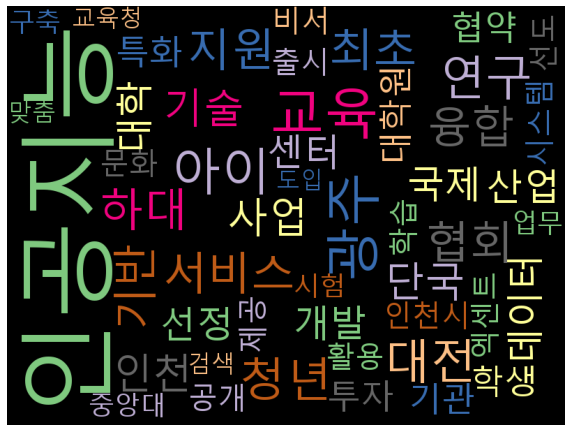

In [22]:
# wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf',
#                       background_color='white',                   
#                       colormap = 'Accent_r',   
#                       width=800,
#                       height=600)

wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf',
                      colormap = 'Accent_r',
                      width=800,
                      height=600)

print(dict(words))

cloud = wordcloud.generate_from_frequencies(dict(words))

plt.figure(figsize=(10, 8))

plt.axis('off')   

plt.imshow(cloud)

plt.show()


## 수고하셨습니다.  😀